# **Ad Fraud Detection**

In [81]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Reading Datasets**

In [82]:
# Reading Training Data set
Data =pd.read_csv("C:/Users/aarus/Downloads/archive/train.csv")
print('Shape of Data:',Data.shape)
Data.head()

Shape of Data: (965, 56)


,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,...,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,...,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,NaN,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN,True


In [83]:
# Reading Testing Data set
Test_Data =pd.read_csv("C:/Users/aarus/Downloads/archive/test.csv")
print('Shape of Traning Data:',Test_Data.shape)

Shape of Traning Data: (455, 56)


In [84]:
Click_log =pd.read_csv("C:/Users/aarus/Downloads/archive/click_log.csv")

C:\Users\aarus\AppData\Local\Temp\ipykernel_8748\15089530.py:1: DtypeWarning: Columns (22,24,25,26,29,30,31,32,33,34,46,47,48,49,50,51,52,53,54) have mixed types. Specify dtype option on import or set low_memory=False.
  Click_log =pd.read_csv("C:/Users/aarus/Downloads/archive/click_log.csv")


In [85]:
# Check the Column Names
Data.columns

Index(['clientid_cr', 'clmbuserid_cr', 'conversiontime_cr', 'imprid_cr',
       'adslotdimid_cr', 'algo_cr', 'audiences_cr', 'clickbid_cr',
       'geodimid_cr', 'ip_cr', 'itemcolumbiaid_cr', 'itemid_cr', 'position_cr',
       'pubclientid_cr', 'refurl_cr', 'siteId_cr', 'templateid_cr',
       'goalid_cr', 'time_cr', 'adLogType_cr', 'v_cr', 'allAudiences_cr',
       'pricingtype_cr', 'osId_cr', 'browserId_cr', 'cityId_cr', 'stateId_cr',
       'modelDimId_cr', 'lookUpFrom_cr', 'connTypeDimId_cr', 'ispDimId_cr',
       'countryDimId_cr', 'goalTypeId_cr', 'conversionDurationInMillis_cr',
       'impressionTimeInMillis_cr', 'clickTimeInMillis_cr', 'osVerDimId_cr',
       'uuidSource_cr', 'geoGrpDimId_cr', 'stateGrpDimId_cr', 'deviceId_cr',
       'uvh_cr', 'uv_cr', 'platformId_cr', 'sdkVersion_cr', 'usrClusterId_cr',
       'cityGrpDimId_cr', 'siteClusterIds_cr', 'refClusterId_cr', 'paid_cr',
       'spend_cr', 'attributionType_cr', 'conversionid_cr', 'optimize_on_cr',
       'bundleId_cr

In [86]:
# Check the values of Conversion fraud
Data['conversion_fraud'].value_counts()

False    834
True     131
Name: conversion_fraud, dtype: int64

## **Data Cleaning**

In [87]:
# Check Missing Values in features
Data.isnull().sum()

clientid_cr                        0
clmbuserid_cr                      0
conversiontime_cr                  0
imprid_cr                          0
adslotdimid_cr                     0
algo_cr                           20
audiences_cr                     199
clickbid_cr                      296
geodimid_cr                        0
ip_cr                             20
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                       20
pubclientid_cr                     0
refurl_cr                        125
siteId_cr                          0
templateid_cr                    107
goalid_cr                          0
time_cr                            0
adLogType_cr                       0
v_cr                               1
allAudiences_cr                   47
pricingtype_cr                     0
osId_cr                           21
browserId_cr                      21
cityId_cr                         20
stateId_cr                        20
m

In [88]:
# Sort rows with Maximum Missing Values
Data.isnull().sum(axis=1).sort_values(ascending=False)

515    33
518    33
507    33
508    33
509    33
       ..
206     9
588     9
422     9
309     8
777     7
Length: 965, dtype: int64

In [89]:
# Check how many rows have missing values more than 17
print(Data.shape)
Data[Data.isnull().sum(axis=1)>17].shape

(965, 56)


(21, 56)

In [90]:
# Delete rows with more than 17 missing values rows
Data=Data[Data.isnull().sum(axis=1)<=17]
print('Shape after deleting rows',Data.shape)

Shape after deleting rows (944, 56)


In [91]:
# Check the percetage of missing values in columns
null_val = Data.isnull().sum()
null_per = (Data.isnull().sum()/Data.shape[0])*100
dic ={'No. of Missing Values':null_val,'Percentage of Missing Values':null_per}
df = pd.DataFrame(dic,columns=['No. of Missing Values','Percentage of Missing Values'])
df.sort_values(by='Percentage of Missing Values',ascending=False)

,No. of Missing Values,Percentage of Missing Values
uvh_cr,944,100.000000
conversionid_cr,940,99.576271
bundleId_cr,939,99.470339
sdkVersion_cr,937,99.258475
uv_cr,915,96.927966
optimize_on_cr,904,95.762712
refClusterId_cr,878,93.008475
platformId_cr,833,88.241525
deviceId_cr,833,88.241525
attributionType_cr,770,81.567797


In [92]:
#  Add a Flag to Identify the Train and Test Data Set
Data['Type'] = 1
Test_Data['Type'] = 0

In [93]:
print('Shape of Train Data',Data.shape)
print('Shape of Test Data',Test_Data.shape)

Shape of Train Data (944, 57)
Shape of Test Data (455, 57)


In [94]:
# Concat the Data sets
Full_Data=pd.concat([Data,Test_Data],axis=0)
print('Shape of Full Data',Full_Data.shape)

Shape of Full Data (1399, 58)


In [95]:
# Create a list of columns which has more than 50% missing values and remove those columns
remove_col_lst=df[df['Percentage of Missing Values']>=50.0].index
Full_Data.drop(remove_col_lst,axis=1,inplace=True)
print('Shape of after ',Full_Data.shape)

Shape of after  (1399, 44)


In [96]:
Full_Data = pd.merge(Full_Data, Click_log[["imprId", "clickIp"]], left_on="imprid_cr", right_on="imprId", how="left")
Full_Data['clickIp'] = Full_Data['clickIp'].astype(str)

In [97]:
# Removing cols that are not relavant
not_relevant_col=["v_cr","record_id","templateid_cr","geodimid_cr","goalTypeId_cr"]
Full_Data.drop(not_relevant_col,axis=1,inplace=True)

In [98]:
# Check dtypes of column which has missing values
Full_Data.dtypes[Full_Data.isnull().any()]

audiences_cr             object
clickbid_cr             float64
refurl_cr                object
allAudiences_cr          object
clickTimeInMillis_cr    float64
stateGrpDimId_cr        float64
cityGrpDimId_cr         float64
conversion_fraud         object
imprId                   object
dtype: object

In [99]:
# Conversion column is our Target column 
Full_Data['conversion_fraud'].unique()

array([True, False, nan], dtype=object)

In [100]:
Full_Data['conversion_fraud'].replace((True,False),(1,0),inplace=True)

In [101]:
# Drop the object type columns from data 
Full_Data.drop(Full_Data.select_dtypes('object').columns,axis=1,inplace=True)
Full_Data.isnull().sum()

clientid_cr                        0
conversiontime_cr                  0
adslotdimid_cr                     0
algo_cr                            0
clickbid_cr                      437
itemcolumbiaid_cr                  0
itemid_cr                          0
position_cr                        0
pubclientid_cr                     0
siteId_cr                          0
goalid_cr                          0
time_cr                            0
adLogType_cr                       0
pricingtype_cr                     0
osId_cr                            0
browserId_cr                       0
cityId_cr                          0
stateId_cr                         0
modelDimId_cr                      0
lookUpFrom_cr                      0
ispDimId_cr                        0
countryDimId_cr                    0
conversionDurationInMillis_cr      0
impressionTimeInMillis_cr          0
clickTimeInMillis_cr             191
osVerDimId_cr                      0
uuidSource_cr                      0
g

In [102]:
# Fill the values of data

Full_Data['cityGrpDimId_cr'].fillna(Full_Data['cityGrpDimId_cr'].mode()[0],inplace=True)
Full_Data['stateGrpDimId_cr'].fillna(Full_Data['stateGrpDimId_cr'].mode()[0],inplace=True)
Full_Data['clickTimeInMillis_cr'].fillna(Full_Data['clickTimeInMillis_cr'].mode()[0],inplace=True)
Full_Data['clickbid_cr'].fillna(Full_Data['clickbid_cr'].mode()[0],inplace=True)

## **Data Normalization**

In [103]:
from sklearn.preprocessing import minmax_scale

In [104]:
# Stor column names
cloumn_names=Full_Data.columns

scaled_Full_Data = minmax_scale(Full_Data, feature_range=(0,1))

In [105]:
# Convert to Pandas DataFrame and add Columns names
scaled_Full_Data=pd.DataFrame(scaled_Full_Data,columns=cloumn_names)
scaled_Full_Data.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,...,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud,Type
0,0.873346,0.0,0.830089,0.001423,0.09359,0.944360,0.766087,1.225933e-09,0.027273,0.009414,...,8.463155e-07,1.0,1.0,0.551815,0.0,0.0,0.285714,0.4,1.0,1.0
1,0.873346,0.0,0.000527,0.001423,0.08982,0.944648,0.766087,1.225933e-09,0.179221,0.053143,...,1.191272e-06,1.0,1.0,0.551815,0.0,0.0,0.571429,1.0,1.0,1.0
2,0.873346,0.0,0.000527,0.001423,0.08982,0.944648,0.766087,1.225933e-09,0.179221,0.053143,...,1.191272e-06,1.0,1.0,0.551815,0.0,0.0,0.571429,1.0,1.0,1.0
3,0.873346,0.0,0.831186,0.000769,0.08982,0.944360,0.766087,1.225933e-09,0.027273,0.009414,...,1.040428e-06,1.0,1.0,0.551815,0.0,0.0,1.000000,0.4,1.0,1.0
4,0.873346,0.0,0.830089,0.001423,0.08982,0.944360,0.766087,1.225933e-09,0.027273,0.009414,...,1.168646e-06,1.0,1.0,0.551815,0.0,0.0,0.428571,0.4,1.0,1.0


In [106]:
# Seperate the Train and Test Data Sets using flages created earlier
Data_Modified= scaled_Full_Data[scaled_Full_Data['Type']==1]
Test_Modified= scaled_Full_Data[scaled_Full_Data['Type']==0]

In [107]:
print('Shape of Train Data',Data_Modified.shape)
print('Shape of Test Data',Test_Modified.shape)

Shape of Train Data (1025, 32)
Shape of Test Data (489, 32)


### **Set Target Variable**

In [108]:
# Split the Target column from the Data
X = Data_Modified.drop(['conversion_fraud'],axis=1)
Y = Data_Modified['conversion_fraud']

In [109]:
# Check the Shape of X and Y
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)

Shape of X: (1025, 31)
Shape of Y: (1025,)


### **Balancing Dataset**

In [110]:
# Import the SMOTE algorithm to oversample 
from imblearn.over_sampling import SMOTE
x_res, y_res = SMOTE().fit_resample(X, Y)

In [111]:
# Check Shape of X and Y after resampling it
print('Shape of X:',x_res.shape)
print('Shape of X:',y_res.shape)
print('\n')
# Check the value counts of target variable
print("Before Resambling :")
print(Y.value_counts())
print("\n After Resambling :")
print(y_res.value_counts())

Shape of X: (1626, 31)
Shape of X: (1626,)


Before Resambling :
0.0    813
1.0    212
Name: conversion_fraud, dtype: int64

 After Resambling :
1.0    813
0.0    813
Name: conversion_fraud, dtype: int64


### **Split Train and Test Data set**

In [112]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.20, random_state=0,shuffle= True, stratify=y_res)

print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (1300, 31)
Shape of the y Train : (1300,)
Shape of the x Test : (326, 31)
Shape of the y Test : (326,)


In [113]:
# Import accuracy_score to check the accuracy of Model
from sklearn.metrics import accuracy_score

## **ML Models**

In [114]:
x_train.dtypes

clientid_cr                      float64
conversiontime_cr                float64
adslotdimid_cr                   float64
algo_cr                          float64
clickbid_cr                      float64
itemcolumbiaid_cr                float64
itemid_cr                        float64
position_cr                      float64
pubclientid_cr                   float64
siteId_cr                        float64
goalid_cr                        float64
time_cr                          float64
adLogType_cr                     float64
pricingtype_cr                   float64
osId_cr                          float64
browserId_cr                     float64
cityId_cr                        float64
stateId_cr                       float64
modelDimId_cr                    float64
lookUpFrom_cr                    float64
ispDimId_cr                      float64
countryDimId_cr                  float64
conversionDurationInMillis_cr    float64
impressionTimeInMillis_cr        float64
clickTimeInMilli

### **KNN Classifier**

In [115]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)

kNN.fit(x_train,y_train)

y_pred_KNN = kNN.predict(x_test)

print('Accuracy : %s '%'{0:.2%}'.format(accuracy_score(y_test, y_pred_KNN)))

Accuracy : 83.44% 


In [116]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
classification_rep = classification_report(y_test, y_pred_KNN)


print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Confusion Matrix:
[[117  46]
 [  8 155]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81       163
         1.0       0.77      0.95      0.85       163

    accuracy                           0.83       326
   macro avg       0.85      0.83      0.83       326
weighted avg       0.85      0.83      0.83       326



### **DecisionTree Classifier**

In [117]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

Dt = DecisionTreeClassifier()

Dt.fit(x_train,y_train)

y_pred_Dt = Dt.predict(x_test)

print('Accuracy : %s '%'{0:.2%}'.format(accuracy_score(y_test, y_pred_Dt)))

Accuracy : 90.80% 


In [118]:
conf_matrix = confusion_matrix(y_test, y_pred_Dt)
classification_rep = classification_report(y_test, y_pred_Dt)


print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Confusion Matrix:
[[144  19]
 [ 11 152]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.88      0.91       163
         1.0       0.89      0.93      0.91       163

    accuracy                           0.91       326
   macro avg       0.91      0.91      0.91       326
weighted avg       0.91      0.91      0.91       326



### **Gradient Boosting Classifier**

In [119]:
# Gradient Boosting Classifier
# Import Grdient Boosting Classifier from sklearn
from sklearn.ensemble import GradientBoostingClassifier

# Create  ML Model and fit the training data
GBC = GradientBoostingClassifier(learning_rate=0.2, max_depth=4, n_estimators=200, random_state=25)
GBC.fit(x_train, y_train)

# Predict Output and Store it 
y_pred_GBC= GBC.predict(x_test)

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy : %s '%'{0:.2%}'.format(accuracy_score(y_test, y_pred_GBC)))

Accuracy : 96.93% 


### **Confusion Matrix**

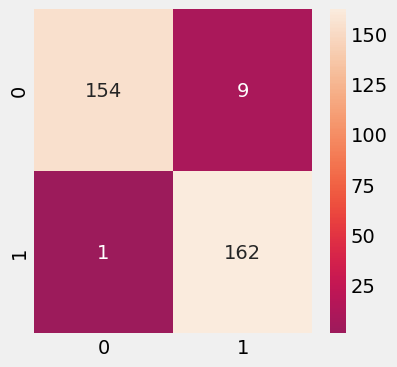

In [120]:
# Confusion Matrix

# Analyze the Performance of Gradient Boosting using Confusion matrix
from sklearn.metrics import confusion_matrix
Conf_Matrix = confusion_matrix(y_test, y_pred_GBC)

plt.style.use('fivethirtyeight')
# Visualize the Confusion Matrix using heatmap
plt.rcParams['figure.figsize'] = (4,4)
sns.heatmap(Conf_Matrix, annot = True, fmt = '.8g',center=30,cmap="rocket")
plt.show()

### **Classification Report**

In [121]:
# Check the Classification report for performance analysis

from sklearn.metrics import  classification_report
Class_Report = classification_report(y_test, y_pred_GBC)
print(Class_Report)

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       163
         1.0       0.95      0.99      0.97       163

    accuracy                           0.97       326
   macro avg       0.97      0.97      0.97       326
weighted avg       0.97      0.97      0.97       326



In [124]:
# Check the Classification report for performance analysis

from sklearn.metrics import  classification_report
Class_Report = classification_report(y_test, y_pred_GBC)
print(Class_Report)

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       163
         1.0       0.95      0.99      0.97       163

    accuracy                           0.97       326
   macro avg       0.97      0.97      0.97       326
weighted avg       0.97      0.97      0.97       326



## **Applying ML Model On Testing Dataset**

In [125]:
Test_Modified.head()

,clientid_cr,conversiontime_cr,adslotdimid_cr,algo_cr,clickbid_cr,itemcolumbiaid_cr,itemid_cr,position_cr,pubclientid_cr,siteId_cr,...,conversionDurationInMillis_cr,impressionTimeInMillis_cr,clickTimeInMillis_cr,osVerDimId_cr,uuidSource_cr,geoGrpDimId_cr,stateGrpDimId_cr,cityGrpDimId_cr,conversion_fraud,Type
1025,0.948305,0.0,0.450991,0.001423,0.089820,0.960550,0.960560,3.677799e-09,0.031248,0.000000,...,1.464801e-04,1.0,1.0,0.000000,0.0,0.166667,0.428571,0.4,NaN,0.0
1026,0.873346,0.0,0.984079,0.000731,0.104553,0.944648,0.766087,1.225933e-09,1.000000,0.998178,...,8.328189e-07,1.0,1.0,0.551710,0.0,0.000000,0.000000,0.2,NaN,0.0
1027,0.873346,0.0,0.984079,0.000654,0.104553,0.944360,0.766087,1.225933e-09,1.000000,0.998178,...,2.188432e-06,1.0,1.0,0.551710,0.0,0.000000,0.000000,0.2,NaN,0.0
1028,0.345516,0.0,0.978965,0.000769,0.089820,0.997236,0.982921,1.225933e-09,0.000000,1.000000,...,2.638583e-05,1.0,1.0,0.998301,0.0,0.000000,0.714286,1.0,NaN,0.0
1029,0.345516,0.0,0.978965,0.000769,0.089820,0.997236,0.982921,1.225933e-09,0.000000,1.000000,...,2.127261e-05,1.0,1.0,0.998301,0.0,0.000000,0.714286,1.0,NaN,0.0


In [126]:
# predict the converstion fraud for test data set and store it
result= GBC.predict(Test_Modified.drop(['conversion_fraud'],axis=1))

In [127]:
# Convert to pandas DataFrame
# result=pd.DataFrame(result,columns={'conversion_fraud'})
result = pd.DataFrame(result, columns=['conversion_fraud'])

In [128]:
result['conversion_fraud'].replace((1,0),(True,False),inplace=True)

In [129]:
Test_Modified = pd.merge(Test_Data, Click_log[["imprId", "clickIp"]], left_on="imprid_cr", right_on="imprId", how="left")
Test_Modified['clickIp'] = Test_Modified['clickIp'].astype(str)
result.set_index(Test_Modified['clickIp'], inplace=True)

### **Store the Result**

In [131]:
# Store the Final result
result.to_csv(r"C:/Users/aarus/Downloads/archive/Result.csv")

In [132]:
result["conversion_fraud"] = result["conversion_fraud"].astype(int)
num_conversions =  (result["conversion_fraud"] == 0).sum()

Results can be see in the file result.csv